<a href="https://colab.research.google.com/github/fernandotoscano/BREAST_CANCER_DATA_SCIENCE/blob/main/BREAST_CANCER_PROJECT_YOUTUBE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description:
### This program detects breast cancer, based off of data.Immediately when we see the word "detect", we can think of in a Machine Learning classifer. So we whant to basically classify the data, as eather cancerous or not cancerous. So is that how we detect cancer within the data.  


In [1]:
# PROJECT BREAST CANCER, Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(7)

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


### "M" means Malign and "B" Benign. "_se" means standard error. In the last column in have "Unnamed: 32" wich have a lot of empty values or NaN values

In [3]:
# Count the number of rows and columns in the data set.
# Each row represents a patient, it means that we have 569 patients.
# We also have 33 columns that means 33 features or
df.shape

(569, 33)

### "(569, 33)"This means that we have 569 patients (rows) and 33 features (columns) or attributes in each column or different data points. Has we saw in the last column we don't much information, so it's less then 33 columns.

In [4]:
# Count the number of empty values in each column (for exemple Nan, NAN, na)
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### With this we obtain the SUM of the count of the empty values in each column. We can observe that almost all columns don't have empty values wich is amazing, except the last one wich is "Unnamed:32", it has 569 empty values. Meaning that literally that we have no data in that column. So we get rid of this column.

### Now we are going to rid of that column. So we go to get rid of this column using: drop the column.   

In [5]:
# Drop the column with all missing values,
# we are realy droping all the columns that missing values.
# But we have only one column with missing values,
# we are going to drop only that column [df.dropna(axis=1)].
# And then we have a new data set without that empty column,
# so we have to store that in the original data frame
# using:
df = df.dropna(axis=1)

In [6]:
# let´s get the new count of the number of rows and columns
df.shape

(569, 32)

### Now we gonna exploring our data cleanning up right now, before we create our model, which is gonna be doing the classification or detection of the cancerous cells.  

###  So now we gonna get a count of the number of Malignant (M) or Benign (B) cells. We want the information from diagnosis column " df['diagnosis']", and we want the count of the values ".value_count()". This should let us know the count of each value.

In [7]:
# Get a count of the number of Malignant (M)  or Benign (B)  cells.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### So we have 357 rows of data where the cells of each patient are Benign, and 212 rows of data where the cells are Malign, in this case it doesn't mean that those patients passed away, but only that they have cancer.

### Next we gonna visualize the count. And to do that we gonna use the Seaborne library, we use "sns.countplot(df['diagnosis'])", the name of the column. And we must specify wich column we want wich is 'diagnoses' and a label='count' in y axes we have the count of Benign and Malign values on the diagnosis column.

<Axes: xlabel='diagnosis', ylabel='Count'>

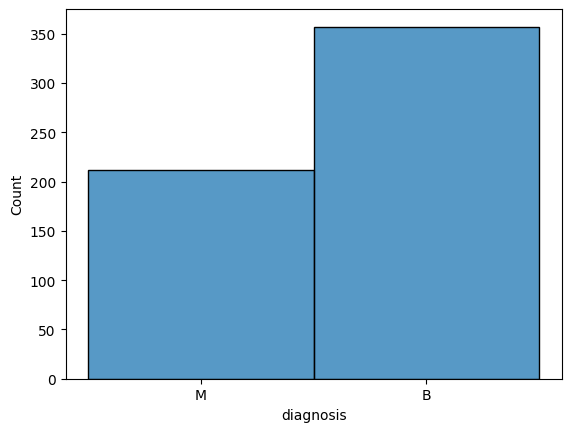

In [8]:
# Visualize the count
sns.histplot(df['diagnosis'], label='count')

## NOT CORRECT, see where's the error!!!!

### We can see visually that there are more patients with Benign cells so  that don't have cancer then there are patients Malignant cells that have cancer.

# Now let's go to see what are the data types to see which columns need to be encoded

### Lets see what columns need to be transformed in number value. Like an integer or a float.  So we are going to searching for categorical data [Categorical data, as the name implies, are usually grouped into a category or multiple categories. Similarly, numerical data, as the name implies, deals with number variables. Categorical data can take on numerical values (such as “1” indicating Yes and “2” indicating No), but those numbers don’t have mathematical meaning. One can neither add them together nor subtract them from each other. ].

### To do this we write "df.dtypes". We run the cell,  and we have all of the columns data types.

In [9]:
#Look at the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### So it looks like that "id" is an integer value (int64) and won't gives us much information, only identifies the patient, and probably we can get rid of that column.
### The column "diagnosis" is an object and we know that's an object because we can see that contains the letters "M" and "B", those are the values in that column, so it's an object, it's a string or  categorical data.
### And every thing else, all the other values seems to be float's. And we see that we don't have the other column called "Unnamed: 32", that column is no longer in the table because we have droped that column.  


## Now we are encode the categorical data values. And now what we have to do is use a library called "sklearn.preprocessing import LabelEncoder". And we are also creating a variable called "labelencoder_Y = LabelEncoder() ". And now we want to transform our categorical data in to numbers. So using "labelencoder_Y.fit_transform(df.iloc[1])" with the data that we want to transform in the location 1 or it is the index 1 "diagnosis" (because the index 0 is the "id", and the index 2 is the "radius_mean"). And we want also to get all of the rows in index 1 or column "diagnosis", using the notation ":", so we have to do this "[:,1]", "labelencoder_Y.fit_transform(df.iloc[;,1])". As we whant the values we have to had ".values", inputting the values here basically as an array (CONJUNTO/MATRIZ) inside of this function or method which is "df.iloc[:,1].value". we are now running this function and show the results with the last line.

In [10]:
#Endode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.iloc[:,1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

### Now we can see that is showing the values of our data frame and it is an array (conjunto/matriz). Now if we run this again wiyhout last line we obtain:

In [11]:
#Endode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,1].values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### In this time (above) is only printing the encoded values. where the value "M" is represented by number 1 and the value "B" is represented by number 0.

## And now we want put this data back in our data frame. So what we have to do is modify the last line of code, "like(df.iloc[:,1] = ..." or all the rows from the "diagnosis" column to be equal to this new transformation):

In [12]:
#Endode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.iloc[:,1]

<ipython-input-12-0bc3012d3ada>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### And now if we do this (df.iloc[:,0]) we obtain the column "diagnosis" and all the rows with 1's and 0's transformed.

In [13]:
#Endode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

#df.iloc[:,1]

## Now let's create a pair plot, so to do this we'l gonna use Seaborn again. And we have to tell what data or columns we want to pair with or match with. To do that we have to write "sns.pairplot(df.iloc[:, 1:], ), This ":" means all the rows and "1:6", from index 1 to index 6. Index 6 is not included.

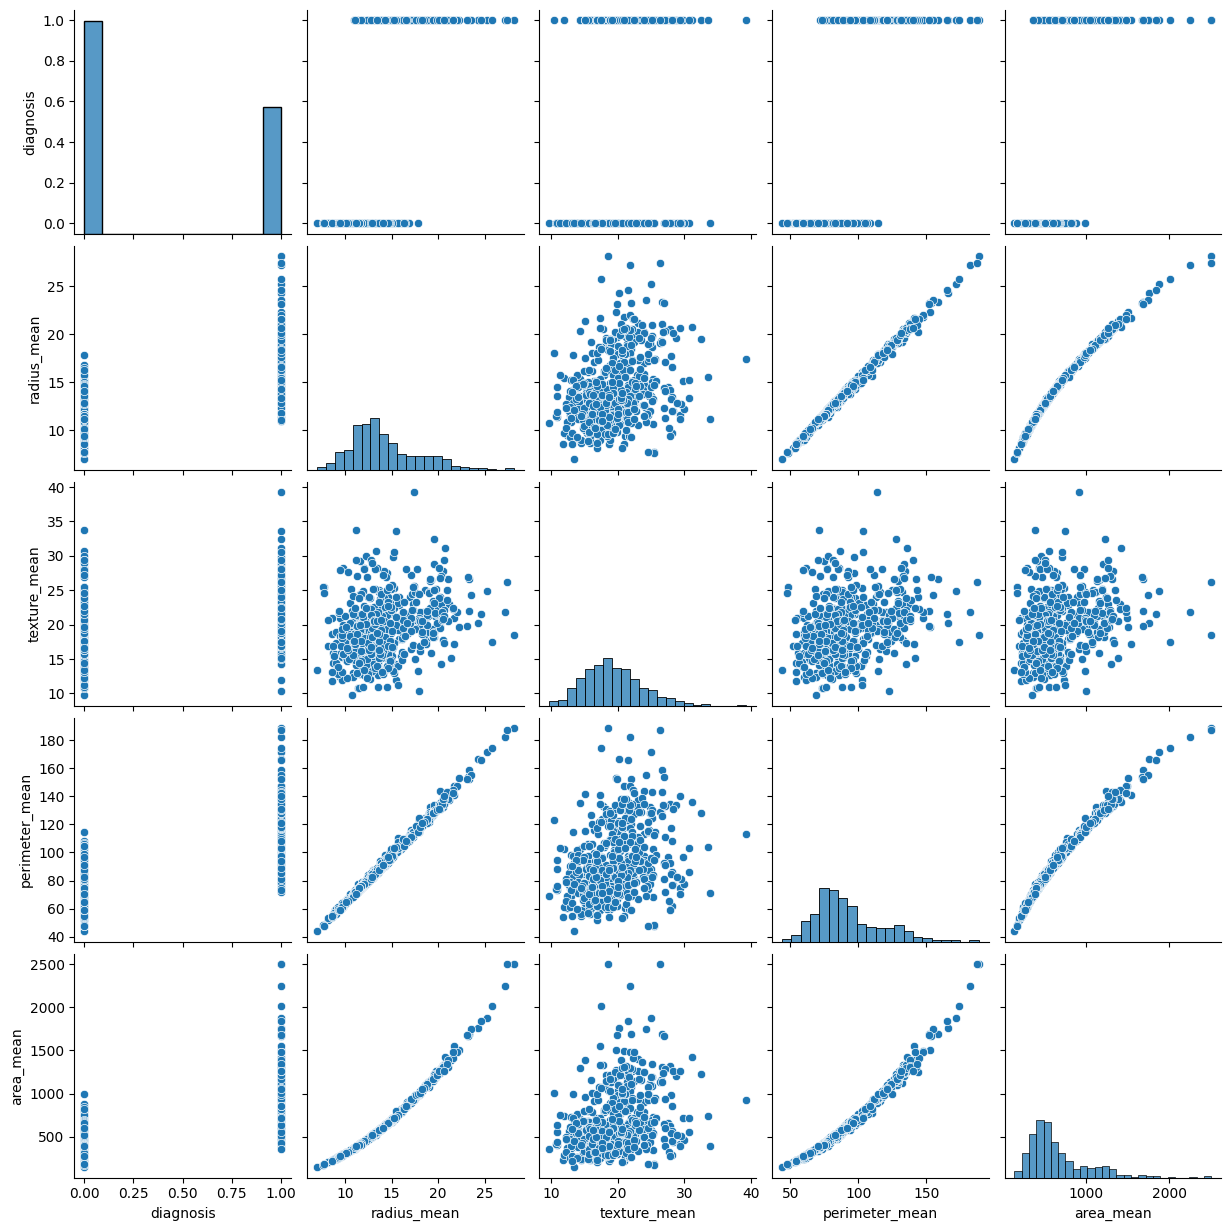

In [14]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:6])

Now we can see the columns 1 a 5. The index 1 is diagnosis, index 2 is radius_mean, index 3 is texture_mean, index 4 is perimeter_mean and index 5 is area_mean. So we are comparing 5 columns. We can see that some of the graphs are out of the screen. So we are changing the columns index to 5.

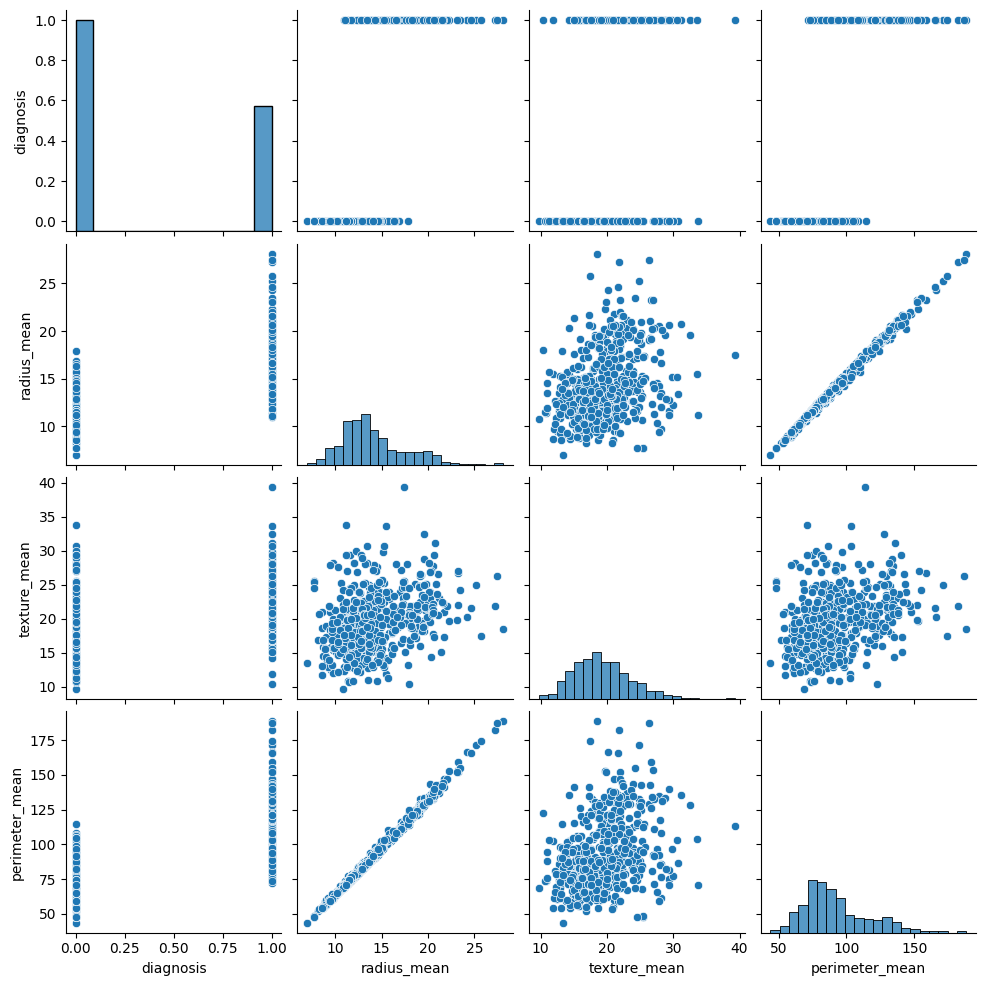

In [15]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:5])

But we can do even better or this can look it better. We can see the diagnosis points on this graphs, so to do that we just type "hue='diagnosis'".  

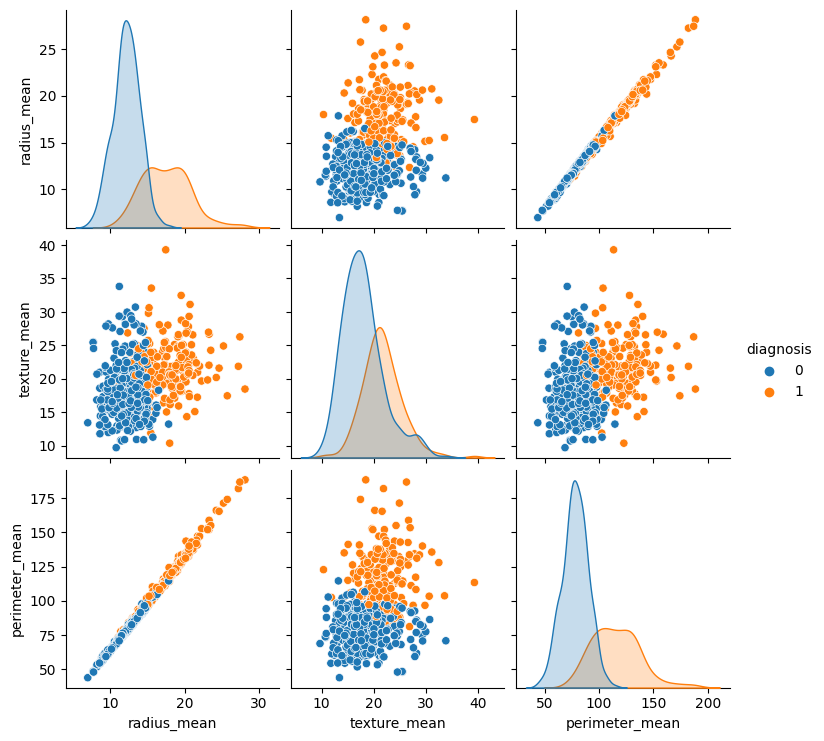

In [16]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue='diagnosis')

And now we can see the Malignant and Benign cells. Benign cells are blue repesented by number 0, and Malignant cells are orange represented by number 1.

# **Now let's print the first 5 rows of the new data set.**  

In [17]:
#Print the first 5 rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we have diagnosis column which is only 1's and 0's. And we don't have the column with empty values in the end. So this is the new cleaner data.
We don't need the "**id**" column, but we will not dropped off, we'll gona rid off it using a different way then using the drop method or function.
We only get ride of that column when we are realy actually trainning our model to detect cancer.

### Let's continue exploring our data a little bit more.
# **Let's look at correlations.**





Get the correlation of the columns, taking a sample of the columns. Taking all the rows (represented by ":"), from the columns 1 to 12 . The 12's column is not included. The first column (index 1) is the dianosis column. But the real first column is represented by 0. Index 0 is 'id'.
We want the correlations then we use .corr()

In [18]:
#Get the correlation of the columns
df.iloc[:,1:12].corr()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


# **When we run the cell above, and we can see the correlations between each column. We can see how one column can influence the other.**
# **For exemple, 'radius_mean' has a positive (0.730029) influence in 'diagnosis', and 'fractal_dimension_mean' has a negative (-0.012838) influence in 'diagnosis' column.  **
Of course if we have a value zero it means that that column doesn't have any influence in the other (correlated) column.



# *   **In the next cell we are going to visualize the correlation, then we are going to use again Seaborn**
sns.heatmap(df.iloc[:, 1:12])
and we need to tell what columns we are going to show (using iloc). We are using column index 1 'diagnosis', to index 12 wich is not included (because we use iloc function), and all the rows of each column using ':'. And we are going to show the correlation "corr()".



<Axes: >

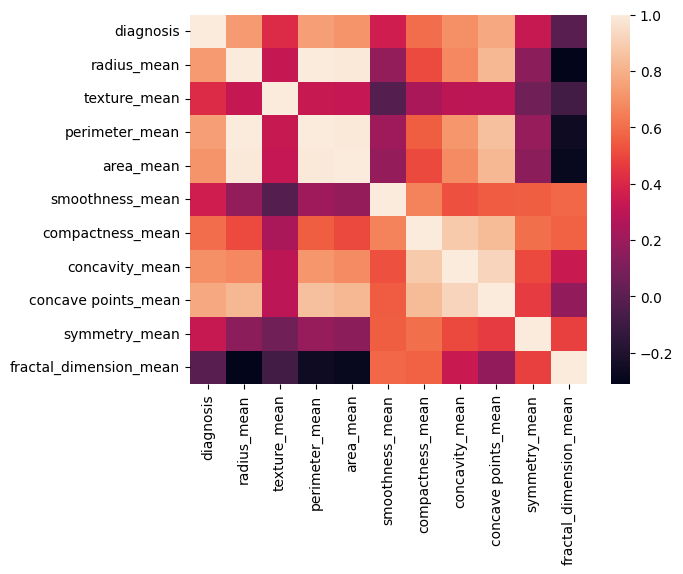

In [19]:
#Visualize the correlation
sns.heatmap(df.iloc[:,1:12].corr())

Above we can visualize better the correlation than in the cell before (which was preesented as a list when we used the line code 'df.iloc[:,1:12].corr()').
But we can this look's much more better. So much more visually appealing. When we look to 'diagnosis' column we can see that radius_mean (for exemple) as a decent positive correlation or influence in relation to 'diagnosis', because when we look to the correspent color it's between 0,60 and 0,80 in the table we can see that's as value 0,730029 of correlation.
**To have a better visualization let's add that value to the heatmap.**
So to do that we only have to add next "sns.heatmap(df.iloc[:1,1:12].corr(), **annot=true**)"




<Axes: >

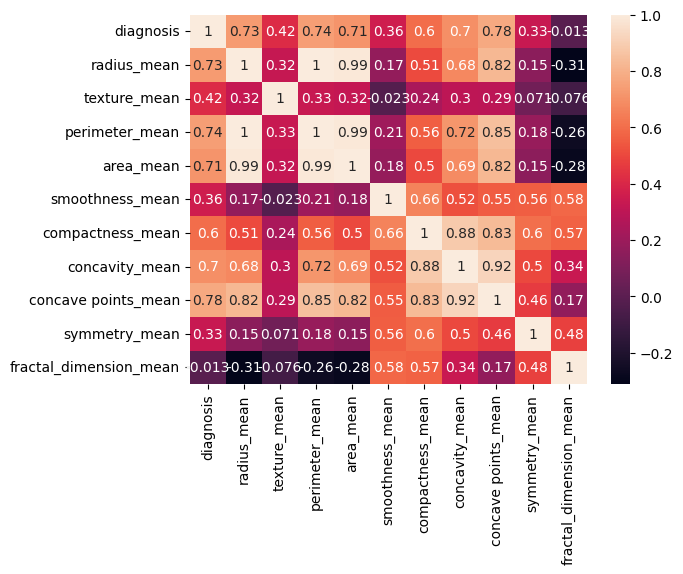

In [20]:
#Visualize the correlation
sns.heatmap(df.iloc[:,1:12].corr(), annot=True)

Now what we can see are the numbers inside our cell. But some numbers are hard to see. So we can change the size of the cells. Using "**plt.figure(figsize=(10,10))**"


<Axes: >

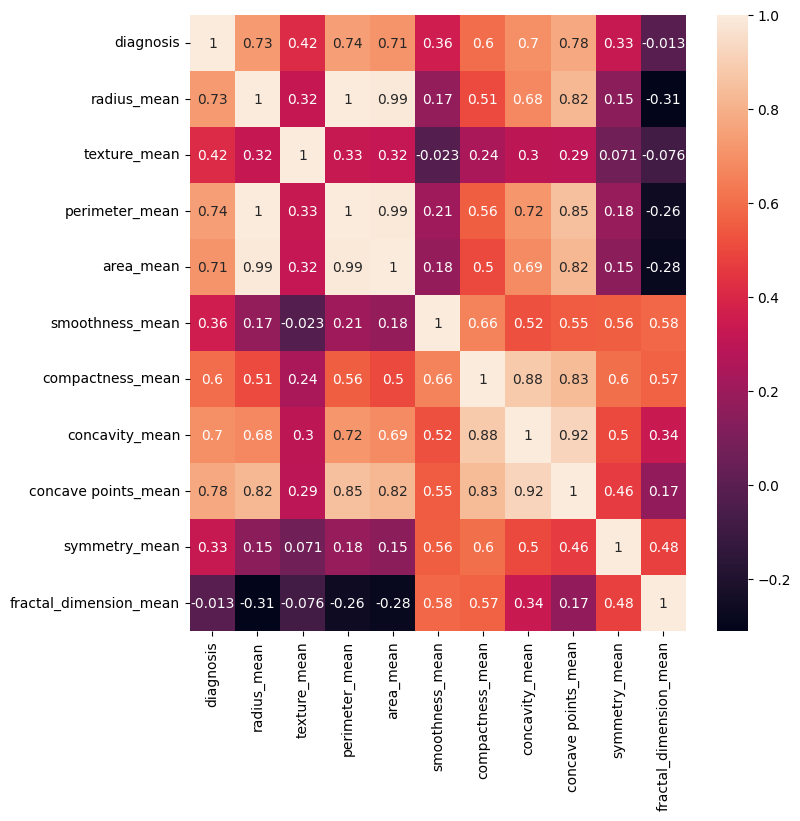

In [21]:
#Visualize the correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True)

Now this looks much more better. And we can clearly see each correlation number associated to each cell. Burt we can see it much more better, using the percentages. Doing this:
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, **fmt='.0%'**)


<Axes: >

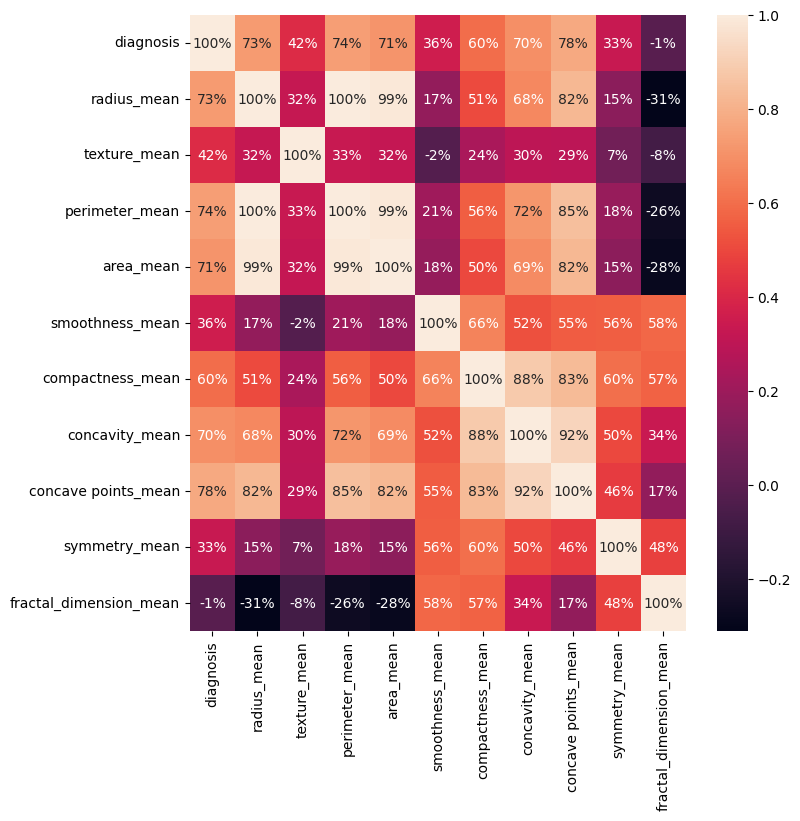

In [22]:
#Visualize the correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

Now it looks better with the percentages. We can see how a column influences the other. We don't have all the columns because of the the visualization field.

**Now let's go to all this is about, the objective of this video. Wich is detect the cancerous cells**
# Now that we explored the data, and manipulated we have cleaned the data.


# *   **Let's finally create our model to detect the cancerous cells**

## **THE FIRST THING WE NEED TO DO IS SPLIT THE DATA IN TO INDEPENDENT AND DEPENDENT DATA SETS.**

## **IN FIRST PLACE WE ARE GOING TO DEAL WITH INDEPENDENT (X) AND DEPENDENT (Y) DATA SETS**
## The independent variable **X** is going to use all the rows "notation **:** " of the data, from the column after 'diagnoses' wich corresponds to index 2 until the column index 31 but this is one is not included, this column doesn't exist or doesn't have any values, that's why we use it because is not included, we will only go to the last column wich is index 30. And we want values to be an array.
# Then we gonna create the dependent set, so we gonna create a variable **Y**. We want all the from the column 'diagnosis' wich is the column with index 1, with all of his values, that want it to be also an array.
And if we look at data type for example variable X (dependent variable)(type(X)) we shell observe thats a numpy array.

In [23]:
#Split the data set into independent (X) and dependent (Y) data sets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

type(X)

numpy.ndarray

 But before the data type was a data frame (when we use type(df)), was a appendix dataframe.

In [24]:
#Split the data set into independent (X) and dependent (Y) data sets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

type(df)

pandas.core.frame.DataFrame

# **The reason why we changed it, in to arrays its because of the parameters, that we are taking in for the model.**


# Now we gonna create a new cell, now that we have our independent data set and our dependent data set wich is our target value. So our dependent data set will tell us if the patient as cancer or not.
# And our independent data set wich is X, is going to tell us the features (caracteristicas) that helps us determine if the patient as cancer or not.


 **Let's split the data set into 75% trainning and 25% testing. So we gonna train our model on 75% of the data and we are gonna tested in 25% of this data.  
# So we are going to split the set in 75% trainning and 25% testing: To do this we are going to use another library wich is: **"from sklearn.model_selection import train_test_split"** and we are going to create some variables, one is **X_train**, **X_test**, **Y_train** and **Y_test** and this we gonna set as method or function called train_test_split and we gonna input the data set X and Y and we gonna tell it the test size that is 25%, wich is 0.25, and then we want to give it a rondam state equals to zero 0, but we can use another value as long as we keep the random value the same (depending what we want to do) and than we can run this cell    
 **

In [25]:
#Split the data set into 75% trainning and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25 , random_state = 0)



**25% our data are X_test and of course Y_test correlated to that (X_test)**, **75% of our data are X_train and Y_train correlated to that (X_train)**,

# **Now let's scale the data to bring all the features to the same level of magnitude. So this means that the data will be within a specific range, for exemple from 0 to 100 or 0 to 1. We will need another library, "from sklearn.preprocessing import StandardScaler".

And we will create a a variable called "sc = StandardScaler()". And we will transform our data with
"sc.fit_transform(X_train)" and we will do that to all of our feature or our independent data (X). So
"sc.fit_transform(X_test)". And we want to store it back into our original data set. So to do that we are gonna type **X_train = sc.fit_transform(X_train)** and **X_test = sc.fit_transform(X_test)**, and we are going to run this, and print our X_train data:

In [26]:
#Scale the data (Feature Scaling, escalar as características)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.69592933,
        -0.36433881,  0.32349851],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.29277423,
        -1.45036679,  0.62563098],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.26255563,
         0.72504581, -0.51329768],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.78274313,
        -0.98806491, -0.69995543],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.36015587,
        -1.75887319, -1.56206114],
       [-0.74662205,  1.14066273, -0.72203706, ...,  0.47201917,
        -0.2860679 , -1.24094654]])

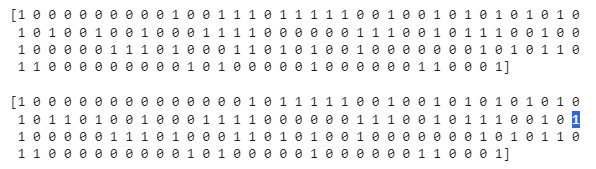Printing our X_train data we can see the values (above) now. Then we can remove X_train, that we used to print the data, we don't need that for the next step, because we use it only to see the data obteined with the transformation.


In [27]:
#Scale the data (Feature Scaling, escalar as características)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# **# Now let's create a few models. Maybe 3 models to try to detect cancer. So we are going to create a function for this, called **def models(X_train, Y_train)**:**

# *   **For our first model we are going to use: **
#LOGISTIC REGRESSION, so it's gonna be a LOGISTIC REGRESSION MODEL.
# For that we are going to use a library wich is:
# ** from sklearn.linear_model import LogisticRegression.**
# **And we are going to create a variable called **
# **log = LogisticRegression(random_state=0)**
# random_state=0, wich is what we have on the top as well.
# And we are going to train our data, by typing the **.fit**  method or function, inputing our trainning data :
# log.fit(X_train,Y_train)

# **Then we are going to create another model:  **
# **DECISION TREE.**
# For that we are gonna need another library:
# from sklearn.tree import DecisionTreeClassifier
# and we are going to create a variable tree with some parameters, like criterion = 'entropy' and the same random_state = 0, like we use above.
# tree = DecisionTreeClassifier()**
## And we need to train this model so we gonna use the fit function again.




*   # And we will create a another model, wich is **Random Forest Classifier**
So to do that we are going to create another library:
# **from sklearn.ensemble import RandomForestClassifier and we gonna create a variable "forest".**
# forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
# and we gonna give it a number of estimators equals to 10 and the criterion equals to 'entropy' and the random_state = 0 again.
## Then like in the two models before we gonna train the model again with function fit, and we gonna train on the same data, on our trainning data: X_train and Y_train.


# **In the next step, now that we have the 3 models we are going to print models accuracy on the trainning data. To do that we have to use the Score method or function. So we gonna type print('[0]Logistic Regression'Training Accuracy:', log.score(X_train, Y_train)), "[0]", this means index zero for model 1, and so one. We will copy this line and past it 2 more times to the other 2 models.
**

# **In the end we must use "return" our models: log, tree and forest. And we run this cell. If we don't receive any error message its good. And we create a new cell and:**

In [28]:
# Create a function for the models
def models(X_train, Y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Print the models accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))


  return log, tree, forest

And now in the new cell, we create a variable called "model". And we call it "#Getting all of the models"

In [29]:
#Getting all the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9953051643192489


# Now we can see how well our models did in our training data. The model that did best was the Decision Tree Classifier with 100% of accuracy, and the second model was Random Forest Classifier.


# *   In the next cell, we will test our model on **"testing data"**. And to do that we gonna use the **confusion matrix** to test model accuracy on test data. So to do that we gonna import the library:           "**from sklearn.metrics import confusion matrix**". So we gonna create a variable called "**cm = confusion_matrix(Y_test, model[0].predict(X_test))**" with the testing data in the position zero, wich corresponds to the Logistic Regression Model, and we also gonna put its predictions for the testing data (X-test), this part **(..., model[0].predict(X_test)), thist part is gonna give us what it thinks the actual values are for our features (características) in the testing data, and Y_test is the actual values. And then we gonna run this lines of program (generally first we run the lines of the cel to see if there's any error, and then we use print to see the results), and print. **                                 .




In [30]:
#Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model[0].predict(X_test))

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]


print(cm)
print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))



[[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951


When we print values of confusion matrix we obtain the result above with true positives, true negatives, false positives and false negatives values.
So we have true positives equals to 86 and 50 false negatives. False positive value of 4 and false negative value of 3.
So to get the accuracy of our model on this testing data, we can calculate it using this values, so we are going to create a variable called "TP" for True Positives at the position zero, zero. And a variable "TN" fort True Negative wich is at the position one, one. The variable "FN" False Negative at the position one, zero. And finally the variable "FP" wich is at the position zero, one. And after the other print statment we gonna print('Testing Accuracy =', (TP + TN)/ (TP + TN + FN + FP)). Then we run this all cell we are going to obtain the  that Logistic Regression Accuracy is
 0.951048951%. We can also obtain the precision and the recall on this way as well but that would take some time.

# **So we will see a diferent way to get some metrics on how well our models are doing. What we did only getting us the data or accuracy for only one model which is the Logistic Regression model. **
# **So lets get the data for all of our models, so we are going put all this in a loop, using:**
# **"for i in range(len(model)) ".**
# And we will put all the variables (TP, TN, FN, FP) in the loop, and now don't want only the logistic regression but all the models in the loop, so we substitute model[0] for model[i], this will give us all of the models, and we want to print wich model and what the index of the model is being printed, and we want to see the accuracy of wich model is being printed so we need to put in the printing statment also the index i **"print('Model ', i )"**, to see Model 1, Model 2 and Model 3. In the end we need also a print statment with no parameter values "print()" :

for i in range(len(model)):
  print('Model ', i )
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print()

In [34]:
#Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print('Model ', i )
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print()

Model  0
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951

Model  1
[[83  7]
 [ 2 51]]
Testing Accuracy =  0.9370629370629371

Model  2
[[87  3]
 [ 2 51]]
Testing Accuracy =  0.965034965034965



In the results we have for model 0, or Logistic Regression model as 95.1% of accuracy in testing data. Model 1 wich is the Decision Tree Classifier as 93.7% of accuracy on the testing data, and model 3 Random Forest Classifier wich as the best accuracy in the testing data of 96.5% of accuracy.

# **Now we are going to show how to get all of this metrics without having to do something like we did above with nice methods that we can use. So we gonna Show another way to get metrics of the models **** **
# **What we gonna do is to obtain another metrics from other library "*from sklearn.metrics import classification_report*".**
# We also need to import anather library from sklearn: "**from sklearn.metrics import accuracy_score**"

# So to do that we type: "**print( classification_report(Y_test, model[0].predict(X_test)))**" we are showing one model and then we will do it for all the models. And also add a print statment for accuracy_score: "**print( accuracy_score(Y_test, model[0].pedict(X_test)))**"

In [36]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print( classification_report(Y_test, model[0].predict(X_test)))
print( accuracy_score(Y_test, model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951


# **We obtain all of the metrics shown above, on the Logistic Regression Model. So we can see that the accuracy is the same as we calculated by the other way before. But this time we didn't have to do the calculations of True Positive, False Positive, True Negative and False Negative.  **

# **Now we gonna repeat this for all the models.
# Using a loop for all the models.**


In [38]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ', i )
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))

  #this is to print a new line or blank line
  print()

Model  0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted

# So based on the obtained data. The model that did the best is the Random Forest Classifier. In spite of on the Decision Tree had the best on the training data. But the Random Forest Classifier did not behave so bad in the training data because was the second best model. So we are taking in consideration who best generalizes, wich is the testing data, where Random Forest Classifier did best. **In the overall the Random Forest Classifier had the best performance**, taking in consideration the last sentence.

So in the next cell we are going Print the prediction of Random Forest Classifier Model.
We gonna create a variable called "**pred.**"

"**pred = model[2].predict(X_test)**"model with index 2 wich is our best classifier (Random Forest Classifier). This will gonna predict the values on testing data or for the features (características) on testing data. When we say predict realy mean's classify is going to decide wether or  not the patient has cancer, or if the patient doesn't have cancer.
So we gonna print the prediction of the actual values (Y_test).

In [39]:
#Print the prediction of Random Forest Classifier Model
pred = model[2].predict(X_test)
print(pred)
print()  #this prints a new line or blank line to give one space
print(Y_test)



[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In the first block we can see what our model predicts ,for each of the patients if rather or not have cancer, and in the second block we have the actual values of the patients showing if they have cancer or not.
If we see in blue marked value "1" we have a misclassification in image on dados.jpg or the last value of the second row "1" in the second block and "0" on the first block. The model as we said made a misclassification becauseint the actual value (second block) the patient did had cancer. Also if analyse we find othrer misclassifications. The first block we have the model classifiction and in the second block the actual values.
So the model is not perfect. What we can do is a kind of twick some of the parameters and maybe even test other models as well to see wich one is better and that accuracy up, because right now is 96,5%, and we are dealing we women's  lives, so we wanted to be close of 100% as possible, or close as actual data is. We don't want to  make mistakes with people's lives.


